In [1]:
%cd ..

/home/ltorres/leo/tesis/cloud-classification/code


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from torchvision.io import read_image
import glob
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from random import sample
import torch
import torch.nn as nn

In [4]:
from src.dataset import GCD
from src import config
from src import engine_gnn as engine
from src import utils

from src.models.old.initial_graphnets import GraphConvGNN, GATConvGNN

In [5]:
from sklearn.metrics import accuracy_score

In [6]:
device = config.DEVICE

#### Data loaders

In [7]:
path_train_images = utils.get_gcd_paths(config.DATA_DIR,'train')

In [8]:
train_dataset = GCD(path_train_images, resize=256)

train_loader = torch.utils.data.DataLoader(
        train_dataset,
        batch_size=config.BATCH_SIZE,
        num_workers=4,
        shuffle=True,
    )

In [9]:
path_test_images = utils.get_gcd_paths(config.DATA_DIR,'test')

test_dataset = GCD(path_test_images, resize=256)

test_loader = torch.utils.data.DataLoader(
        test_dataset,
        batch_size=config.BATCH_SIZE,
        num_workers=4,
        shuffle=True,
    )

#### Model

In [10]:
from torchvision import models

In [11]:
torch.cuda.empty_cache()

In [12]:
model = GATConvGNN(7).to(device)

In [13]:
criterion = nn.CrossEntropyLoss()
#criterion = utils.loge_loss
#optimizer  = torch.optim.Adam(model.parameters(), lr=3e-4)
optimizer  = torch.optim.SGD(model.parameters(), lr=3e-4, momentum=0.9)

In [14]:
model_filename = '/new_inference/1_BIG_GRAPH.pt'

### Train

In [15]:
from tqdm import tqdm

In [16]:
best_accuracy=0
best_iteration=0
best_params={}

for e in range(config.EPOCHS):
    ### TRAIN DATASET
    preds, targets, loss = engine.train_fn(model, train_loader, criterion, optimizer, device=device)
    train_acc = accuracy_score(targets, preds)
    
    test_preds, test_targets, test_loss = engine.eval_fn(model, test_loader, criterion, device=device)
    test_acc = accuracy_score(test_targets, test_preds)
    
    if test_acc > best_accuracy:
        torch.save(model.state_dict(), config.SAVE_PATH+model_filename)
        print(f"Saved best parameters at epoch {e+1}")
        best_accuracy = test_acc
        best_iteration = e+1
        best_params = model.state_dict()
    
    print("EPOCH {}: Train acc: {:.2%} Train Loss: {:.4f} Test acc: {:.2%} Test Loss: {:.4f}".format(
        e+1,
        train_acc,
        loss,
        test_acc,
        test_loss
    ))


100%|██████████| 188/188 [00:16<00:00, 11.09it/s]


Saved best parameters at epoch 1
EPOCH 1: Train acc: 70.87% Train Loss: 1.7071 Test acc: 68.14% Test Loss: 1.8432


100%|██████████| 188/188 [00:17<00:00, 10.97it/s]


Saved best parameters at epoch 2
EPOCH 2: Train acc: 85.99% Train Loss: 0.7727 Test acc: 70.89% Test Loss: 1.9318


100%|██████████| 188/188 [00:17<00:00, 10.98it/s]


Saved best parameters at epoch 3
EPOCH 3: Train acc: 88.92% Train Loss: 0.6144 Test acc: 70.94% Test Loss: 2.0449


100%|██████████| 188/188 [00:17<00:00, 11.06it/s]


Saved best parameters at epoch 4
EPOCH 4: Train acc: 89.89% Train Loss: 0.5334 Test acc: 72.81% Test Loss: 1.9453


100%|██████████| 188/188 [00:17<00:00, 11.00it/s]


Saved best parameters at epoch 5
EPOCH 5: Train acc: 91.53% Train Loss: 0.4587 Test acc: 73.92% Test Loss: 1.7978


100%|██████████| 188/188 [00:17<00:00, 10.99it/s]


EPOCH 6: Train acc: 92.68% Train Loss: 0.3904 Test acc: 72.76% Test Loss: 1.8035


100%|██████████| 188/188 [00:16<00:00, 11.07it/s]


Saved best parameters at epoch 7
EPOCH 7: Train acc: 93.82% Train Loss: 0.3426 Test acc: 74.26% Test Loss: 1.9366


100%|██████████| 188/188 [00:17<00:00, 11.01it/s]


EPOCH 8: Train acc: 95.21% Train Loss: 0.2843 Test acc: 73.78% Test Loss: 2.1061


100%|██████████| 188/188 [00:17<00:00, 11.06it/s]


Saved best parameters at epoch 9
EPOCH 9: Train acc: 96.03% Train Loss: 0.2351 Test acc: 74.62% Test Loss: 2.1450


100%|██████████| 188/188 [00:16<00:00, 11.07it/s]


EPOCH 10: Train acc: 96.03% Train Loss: 0.2270 Test acc: 74.38% Test Loss: 2.0236


100%|██████████| 188/188 [00:17<00:00, 11.01it/s]


EPOCH 11: Train acc: 97.00% Train Loss: 0.1839 Test acc: 74.48% Test Loss: 2.1185


100%|██████████| 188/188 [00:17<00:00, 11.05it/s]


EPOCH 12: Train acc: 97.69% Train Loss: 0.1519 Test acc: 73.14% Test Loss: 2.3471


100%|██████████| 188/188 [00:17<00:00, 11.00it/s]


EPOCH 13: Train acc: 97.79% Train Loss: 0.1408 Test acc: 73.80% Test Loss: 2.4424


100%|██████████| 188/188 [00:16<00:00, 11.20it/s]


EPOCH 14: Train acc: 98.58% Train Loss: 0.1057 Test acc: 73.80% Test Loss: 2.5326


100%|██████████| 188/188 [00:17<00:00, 10.95it/s]


EPOCH 15: Train acc: 98.83% Train Loss: 0.0866 Test acc: 73.11% Test Loss: 2.6151


100%|██████████| 188/188 [00:16<00:00, 11.10it/s]


EPOCH 16: Train acc: 98.94% Train Loss: 0.0801 Test acc: 74.23% Test Loss: 2.6553


100%|██████████| 188/188 [00:17<00:00, 10.99it/s]


EPOCH 17: Train acc: 98.88% Train Loss: 0.0786 Test acc: 73.89% Test Loss: 2.6695


100%|██████████| 188/188 [00:17<00:00, 10.97it/s]


EPOCH 18: Train acc: 99.24% Train Loss: 0.0599 Test acc: 73.37% Test Loss: 3.0092


100%|██████████| 188/188 [00:17<00:00, 11.01it/s]


EPOCH 19: Train acc: 99.29% Train Loss: 0.0549 Test acc: 74.20% Test Loss: 2.6581


100%|██████████| 188/188 [00:16<00:00, 11.21it/s]


EPOCH 20: Train acc: 99.34% Train Loss: 0.0545 Test acc: 73.82% Test Loss: 2.8193


100%|██████████| 188/188 [00:17<00:00, 10.98it/s]


EPOCH 21: Train acc: 99.23% Train Loss: 0.0592 Test acc: 74.37% Test Loss: 2.6697


100%|██████████| 188/188 [00:16<00:00, 11.10it/s]


EPOCH 22: Train acc: 99.54% Train Loss: 0.0404 Test acc: 74.01% Test Loss: 2.8926


100%|██████████| 188/188 [00:17<00:00, 11.01it/s]


EPOCH 23: Train acc: 99.81% Train Loss: 0.0274 Test acc: 74.61% Test Loss: 2.7857


100%|██████████| 188/188 [00:17<00:00, 11.03it/s]


EPOCH 24: Train acc: 99.68% Train Loss: 0.0298 Test acc: 73.61% Test Loss: 3.1483


100%|██████████| 188/188 [00:17<00:00, 11.00it/s]


EPOCH 25: Train acc: 99.76% Train Loss: 0.0266 Test acc: 73.72% Test Loss: 3.0255


100%|██████████| 188/188 [00:17<00:00, 11.02it/s]


EPOCH 26: Train acc: 99.91% Train Loss: 0.0179 Test acc: 73.21% Test Loss: 3.2040


100%|██████████| 188/188 [00:17<00:00, 10.89it/s]


EPOCH 27: Train acc: 99.88% Train Loss: 0.0155 Test acc: 73.80% Test Loss: 3.1062


100%|██████████| 188/188 [00:17<00:00, 11.00it/s]


EPOCH 28: Train acc: 99.89% Train Loss: 0.0169 Test acc: 73.06% Test Loss: 3.2652


100%|██████████| 188/188 [00:17<00:00, 11.01it/s]


EPOCH 29: Train acc: 99.83% Train Loss: 0.0220 Test acc: 73.53% Test Loss: 3.4007


100%|██████████| 188/188 [00:17<00:00, 11.01it/s]

EPOCH 30: Train acc: 99.87% Train Loss: 0.0196 Test acc: 74.06% Test Loss: 2.9224


In [17]:
model.load_state_dict(torch.load(config.SAVE_PATH+model_filename))

<All keys matched successfully>

In [18]:
test_preds, test_targets, test_loss = engine.eval_fn(model, test_loader, criterion, device=device)

100%|██████████| 188/188 [00:17<00:00, 10.99it/s]


In [19]:
accuracy_score(test_targets, test_preds)

0.7447777777777778

---

### Accuracy per class and confusion matrix

In [20]:
class_mapper = {
    0: '1_cumulus',
    1: '2_altocumulus',
    2: '3_cirrus',
    3: '4_clearsky',
    4: '5_stratocumulus',
    5: '6_cumulonimbus',
    6: '7_mixed',
}

In [21]:
class_acc = dict()
matrix = np.zeros((7,7), dtype=int)

for i in range(7):
    pred_index = np.where(test_targets==i)[0]
    class_acc[class_mapper[i]] = accuracy_score(test_targets[pred_index], test_preds[pred_index])
    
    for j in test_preds[pred_index]:
        matrix[i,j]+=1 

In [22]:
class_acc

{'1_cumulus': 0.64,
 '2_altocumulus': 0.38666666666666666,
 '3_cirrus': 0.8778220451527224,
 '4_clearsky': 0.9817495280050346,
 '5_stratocumulus': 0.6201117318435754,
 '6_cumulonimbus': 0.8417240130387541,
 '7_mixed': 0.45799011532125206}

Global Test accuracy 0.7447777777777778


<AxesSubplot:title={'center':'Confusion Matrix (Accuracy %)'}>

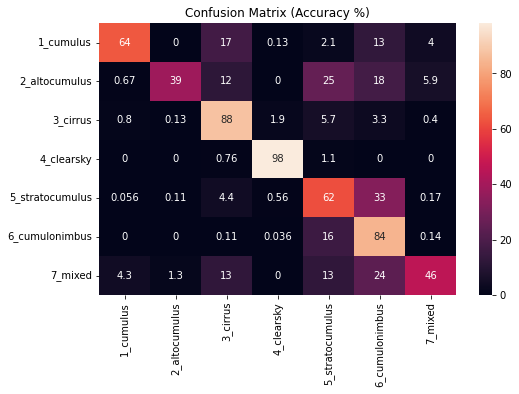

In [23]:
print(f"Global Test accuracy {accuracy_score(test_targets, test_preds)}")

sum_of_rows = matrix.sum(axis=1)
conf_mat = 100*matrix / sum_of_rows[:, np.newaxis]

df_cm = pd.DataFrame(conf_mat, index = class_acc.keys(),
                  columns = class_acc.keys())

plt.figure(figsize = (8,5))
plt.title("Confusion Matrix (Accuracy %)")
sns.heatmap(df_cm, annot=True)